In [4]:
import pandas as pd
import itertools
import copy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Read data

In [7]:
cols = np.arange(2)
f = open('Isoturb_ex_sets_spectrum_data/Dissipation_log_7.txt', 'r')
colstuple = np.loadtxt(f, delimiter=' ', usecols=cols, unpack=True )

In [9]:
colstuple.shape

(2, 135433)

In [11]:
x = colstuple[0]
y = colstuple[1]

In [12]:
x.shape, y.shape

((135433,), (135433,))

### Get to know the data

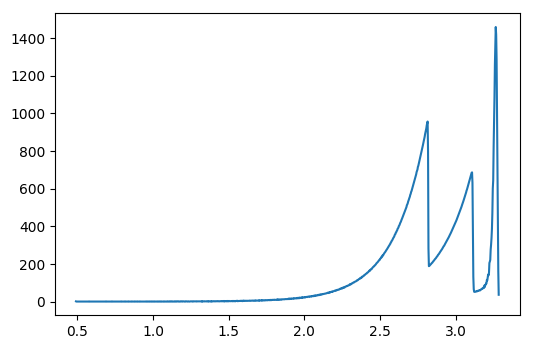

In [38]:
plt.figure( figsize=(6,4), dpi=100 )
freq, bins = np.histogram( x, bins=1000 )
plt.plot( bins[:-1], freq )

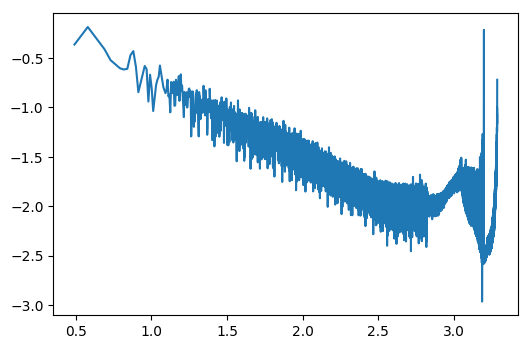

In [46]:
plt.figure( figsize=(6,4), dpi=100 )
plt.plot( x, y )

### Average integral values for some very close adjacent surfaces

In [374]:
def averager( x, y ):
    edges = np.linspace( 0, 2.6, 100 )

    x_new = np.empty( len(edges)-1, dtype=float )
    for i in range( len(x_new) ):
        x_new[i] = np.mean( (edges[i], edges[i+1] ) )

    numvalues = np.empty( len(edges)-1, dtype=int )
    for i in range( len(numvalues) ):
        numvalues[i] = np.logical_and( x > edges[i], x < edges[i+1] ).sum()

    y_new = np.zeros( len(edges)-1, dtype=float )
    err_new = np.zeros( len(edges)-1, dtype=float )
    j = 0
    for i in np.argwhere( numvalues ):
        y_new[i] = np.mean( y[np.logical_and( x > edges[i], x < edges[i+1] )] )
        err_new[i] = np.std( y[np.logical_and( x > edges[i], x < edges[i+1] )] )
        j += 1

    x_avg = x_new[ y_new < -1e-3]
    y_avg = y_new[ y_new < -1e-3]
    err_avg = err_new[ y_new < -1e-3]
    return x_avg, y_avg, err_avg

In [375]:
x_avg, y_avg, err_avg = averager( x, y )

<ErrorbarContainer object of 3 artists>

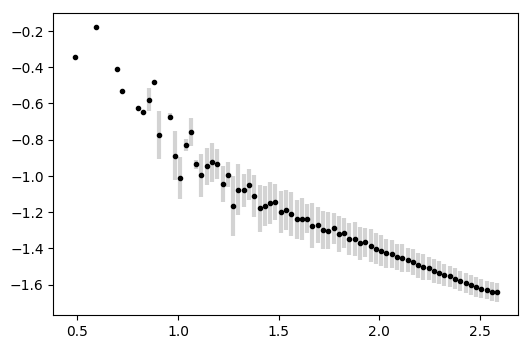

In [376]:
plt.figure( figsize=(6,4), dpi=100 )
plt.errorbar(x_avg, y_avg, yerr=err_avg, fmt='.k', ecolor='lightgray', elinewidth=3)

In [377]:
def linfit( x, a, b ):
    return a*x+b

In [486]:
def final_corr_plot_and_fit( log_r_values, log_correlation_normed, log_corr_err, lower, upper, 
                            rounding=4, t1=-3.5, t2=0, figname="" ):
    a = np.logical_and( log_r_values > lower, log_r_values < upper )
    
    popt, pcov = curve_fit( linfit, log_r_values[a], log_correlation_normed[a], sigma=log_corr_err[a] )
    print("Decaying frequency exponent: %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0,0])))
    
    exponent = popt[0]
    error = np.sqrt(pcov[0,0])
    
    plt.figure( figsize=(8,3), dpi=100 )
    plt.tick_params( axis='both', which='major', labelsize=12 )
    plt.xlabel('$ \log_{10} \left( \\frac{r}{\eta} \\right) $', fontsize=16)
    plt.ylabel('$ \log_{10} C(r) $', fontsize=16)
    plt.errorbar( log_r_values, log_correlation_normed, yerr=log_corr_err, fmt='.b', ecolor='lightblue', elinewidth=3 )
    plt.plot( log_r_values, popt[0]*log_r_values+popt[1], '--', c='r', 
             label='Exponent: '+str(round(popt[0], rounding) )+'+/-'+str( round( np.sqrt(pcov[0,0]) , rounding) ) )
    plt.plot( lower*np.ones( 1000 ), np.linspace( t1, t2, 1000 ), '--', color='green', label='Lower boundary: '+str(lower) )
    plt.plot( upper*np.ones( 1000 ), np.linspace( t1, t2, 1000 ), '--', color='green', label='Upper boundary: '+str(upper) )
    plt.legend( fontsize=10, loc="lower left" )
    plt.ylim([t1, t2])
    plt.subplots_adjust(bottom=0.25)
    plt.title('$S^2$, $\chi = '+figname[-2:]+'\langle S^2 \\rangle$', fontsize = 18)
    #plt.title('$\\frac{1}{2}\omega^2$, $\chi = '+figname[-2:]+'\langle S^2 \\rangle$', fontsize = 18, pad=7)
    plt.savefig( "diss_"+figname+".png", dpi=100 )

    #return exponent, error

### Running code to save figures

Decaying frequency exponent: -1.203 +/- 0.076


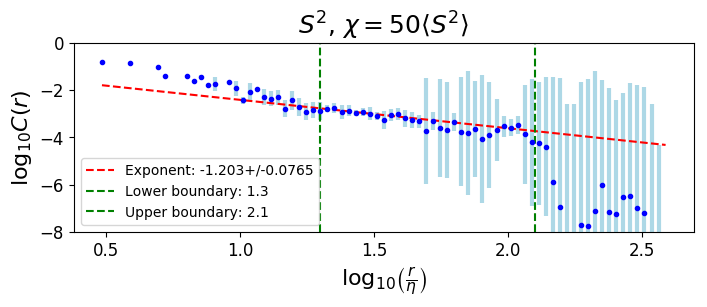

In [501]:
f = open('Isoturb_ex_sets_spectrum_data/Dissipation_log_50.txt', 'r')
colstuple = np.loadtxt(f, delimiter=' ', usecols=cols, unpack=True )
x = colstuple[0]
y = colstuple[1]
x_avg, y_avg, err_avg = averager( x, y )
final_corr_plot_and_fit( x_avg, y_avg, err_avg, lower=1.3, upper=2.1, t1=-8, figname='small_50' )

###  Reading spectrum data and creating plot

In [680]:
def averager_spectrum( x, y ):
    edges = np.linspace( 0, 3.0, 100 )

    x_new = np.empty( len(edges)-1, dtype=float )
    for i in range( len(x_new) ):
        x_new[i] = np.mean( (edges[i], edges[i+1] ) )

    numvalues = np.empty( len(edges)-1, dtype=int )
    for i in range( len(numvalues) ):
        numvalues[i] = np.logical_and( x > edges[i], x < edges[i+1] ).sum()

    y_new = np.zeros( len(edges)-1, dtype=float )
    err_new = np.zeros( len(edges)-1, dtype=float )
    j = 0
    for i in np.argwhere( numvalues ):
        y_new[i] = np.mean( y[np.logical_and( x > edges[i], x < edges[i+1] )] )
        err_new[i] = np.std( y[np.logical_and( x > edges[i], x < edges[i+1] )] )
        j += 1
    
    filting = np.logical_and( y_new < 1e-3, y_new > -1e-3 )
    x_avg = x_new[ ~filting ]
    y_avg = y_new[ ~filting ]
    err_avg = err_new[ ~filting ]
    return x_avg, y_avg, err_avg

In [681]:
f = open('Isoturb_ex_sets_spectrum_data/Energy_spectrum.txt', 'r')
colstuple = np.loadtxt(f, delimiter=' ', usecols=cols, unpack=True )
x = colstuple[0]
y = colstuple[1]
filt = np.logical_and( x !=0, y != 0 )
filt2 = np.logical_and( y > 0, filt )
x_log = np.log10( x[ filt2 ] )
y_log = np.log10( y[ filt2 ] )
x_avg, y_avg, err_avg = averager_spectrum( x_log, y_log )

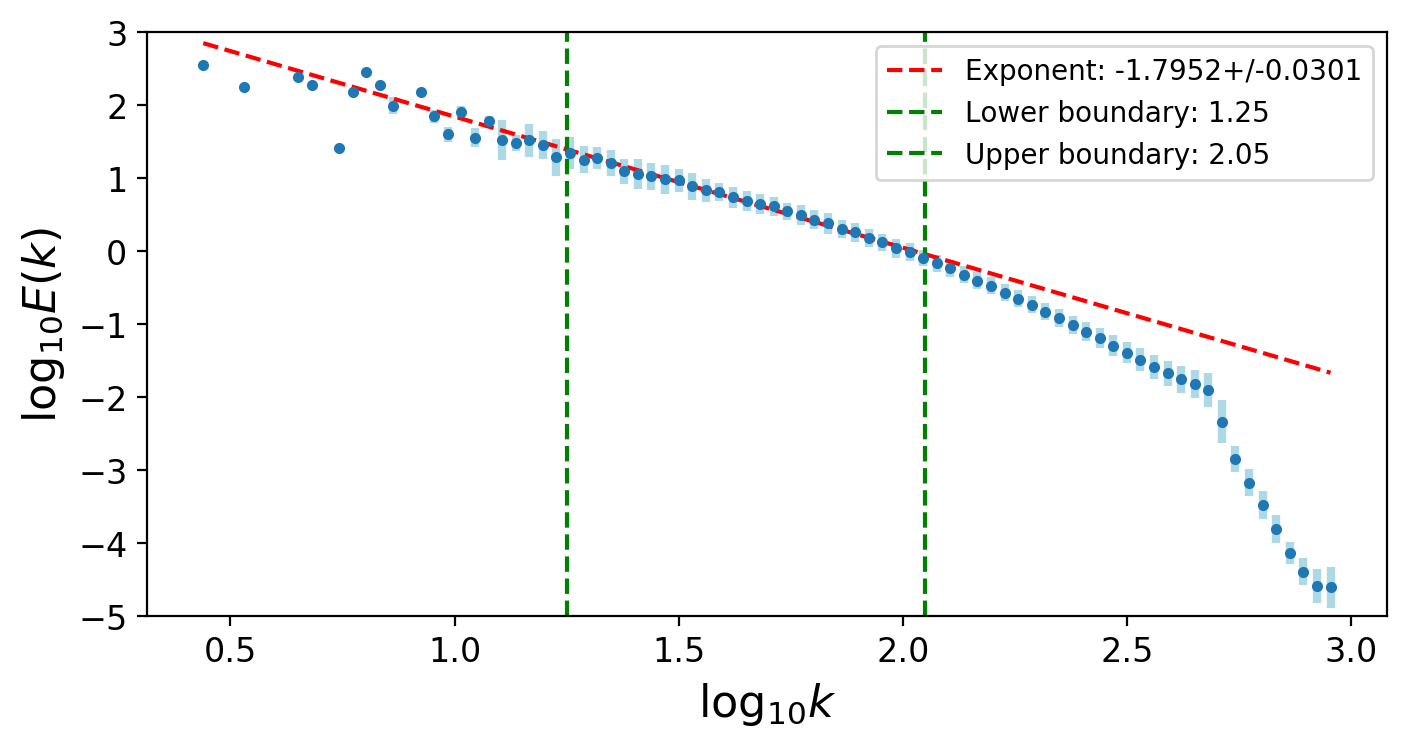

In [699]:
lower = 1.25
upper = 2.05
t1 = -5
t2 = 3

b = np.logical_and( x_avg > lower, x_avg < upper )
popt, pcov = curve_fit( linfit, x_avg[b], y_avg[b], sigma=err_avg[b] )

plt.figure( figsize=(8,4), dpi=200 )
plt.ylim([t1, t2])
plt.errorbar( x_avg, y_avg, yerr=err_avg, fmt='.', ecolor='lightblue', elinewidth=3 )
plt.plot( x_avg, popt[0]*x_avg+popt[1], '--', c='r', 
             label='Exponent: '+str(round(popt[0], 4) )+'+/-'+str( round( np.sqrt(pcov[0,0]) , 4) ) )
plt.plot( lower*np.ones( 1000 ), np.linspace( t1, t2, 1000 ), '--', color='green', label='Lower boundary: '+str(lower) )
plt.plot( upper*np.ones( 1000 ), np.linspace( t1, t2, 1000 ), '--', color='green', label='Upper boundary: '+str(upper) )
plt.tick_params( axis='both', which='major', labelsize=12 )
plt.xlabel('$\log_{10} k$', fontsize=16)
plt.ylabel('$\log_{10}E(k)$', fontsize=16)
plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.savefig( 'Energy_spectrum.png', dpi=200 )

#### Matching scales for the boundaries of the fit

In [683]:
print('Boundaries for the inertial range:')
print('k = 1.25 -> r =', np.log10(6.28/np.power(10, 1.25)/0.0028))
print('k = 2.05 -> r =', np.log10(6.28/np.power(10, 2.05)/0.0028) )

Boundaries for the inertial range:
k = 1.25 -> r = 2.100801612394977
k = 2.05 -> r = 1.300801612394977
